In [1]:
# some_file.py
import sys
python_source_code_path = "C://Users//NTRG lab//PycharmProjects//High-T-Angstrom-Method"
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, python_source_code_path)

from high_T_angstrom_method import radial_temperature_average_disk_sample,batch_process_horizontal_lines,residual,radial_1D_explicit,show_regression_results
#import high_T_angstrom_method
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
path= "C://Users//NTRG lab//Desktop//Angstrom Method//Rec-000008_e53//" # path of the directory containing filr csv data files
rec_name = "Rec-000008_e53"
output_name = rec_name
num_cores = 6

method = 'MA' #indicate Mosfata's code

x0 = 304 #in pixels
y0 = 256 #in pixels
Rmax = 155 #in pixels
#x0,y0,N_Rmax,pr,path,rec_name,output_name,method,num_cores
pr = 8.89e-2/307
df_temperature = radial_temperature_average_disk_sample(x0,y0,Rmax,pr,path,rec_name,output_name,method,num_cores)

Found previous dump file :Rec-000008_e53_x0_304_y0_256_Rmax_155_method_MA


In [3]:
# After obtaining temperature profile, next we obtain amplitude and phase
f_heating = 0.08
R0 = 40
pr = 8.89e-2/307
gap = 4
#Rmax = 125
R_analysis = Rmax-R0-60
frequency_analysis_method = 'sine'
df_amplitude_phase_measurement = batch_process_horizontal_lines(df_temperature,f_heating,R0,gap,R_analysis,frequency_analysis_method)

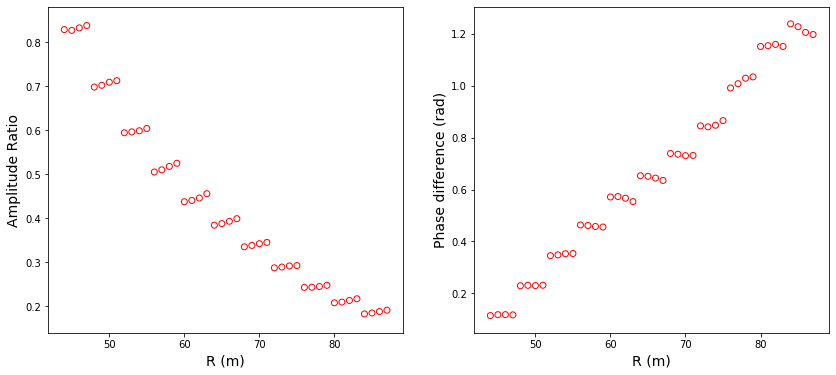

In [4]:
plt.figure(figsize = (14,6))
#plt.scatter(df_result_IR_mosfata['r'],df_result_IR_mosfata['amp_ratio'],facecolors='none',edgecolors='k',label = 'Mostafa')
plt.subplot(121)
plt.scatter(df_amplitude_phase_measurement['r'],df_amplitude_phase_measurement['amp_ratio'],facecolors='none',edgecolors='r',label = 'Yuan')
plt.xlabel('R (m)',fontsize = 14)
plt.ylabel('Amplitude Ratio',fontsize = 14)
#plt.xlim([R0*pr,0.025])
#plt.legend()

plt.subplot(122)
plt.scatter(df_amplitude_phase_measurement['r'],df_amplitude_phase_measurement['phase_diff'],facecolors='none',edgecolors='r',label = 'Yuan')
plt.xlabel('R (m)',fontsize = 14)
plt.ylabel('Phase difference (rad)',fontsize = 14)
#plt.xlim([R0*pr,0.025])
#plt.legend()
plt.show()

In [5]:
df_amplitude_phase_measurement.head()

,r,r_ref,amp_ratio,phase_diff
0,44.0,40.0,0.828218,0.113915
1,48.0,40.0,0.697618,0.228991
2,52.0,40.0,0.593794,0.344979
3,56.0,40.0,0.504799,0.463273
4,60.0,40.0,0.437187,0.571112


In [6]:
R = 8.89/2/100
t_z = 1/32*2.54/100
rho = 2260

cp_const = -220
cp_c1 = 3.04
cp_c2 = -0.00181
cp_c3 = 3.74e-7

#alpha_r = 0.000023867
alpha_r = 1e-05
alpha_z = alpha_r

T_initial = 600+273.15
emissivity = 0.7
absorptivity = 0.7

Rs = 1/100
R0 = Rs+0.002

T_sur1 = 500+273.15
T_sur2 = 50+273.15

Nz = 3
Nr = 152
equal_grid = True
N_cycle = 20

#f_heating = 0.02
V_amplitude = 2
V_DC = 4

ks = 10.98
bs = 98.12
ka = 0.006691
ba = -0.3382
Amax = 76506
sigma_s= 0.01313

sample_information = {'R':R,'t_z':t_z,'rho':rho,'cp_const':cp_const,'cp_c1':
                      cp_c1,'cp_c2':cp_c2,'cp_c3':cp_c3,'alpha_r':alpha_r,'alpha_z':alpha_z,'T_initial':T_initial,'emissivity':emissivity,'absorptivity':absorptivity}

vacuum_chamber_setting = {'Rs':Rs,'R0':R0,'T_sur1':T_sur1,'T_sur2':T_sur2}

vectorize = True

numerical_simulation_setting = {'Nz':Nz,'Nr':Nr,'equal_grid':equal_grid,'N_cycle':N_cycle,'vectorize':vectorize,'Fo_criteria':1/3,'frequency_analysis_method':frequency_analysis_method,'gap':gap}

solar_simulator_settings = {'f_heating':f_heating,'V_amplitude':V_amplitude,'V_DC':V_DC}

light_source_property = {'ks':ks,'bs':bs,'ka':ka,'ba':ba,'Amax':Amax,'sigma_s':sigma_s}

In [7]:
from scipy.optimize import minimize
#params = [2e-4]
res = minimize(residual, x0 = 2.4e-5,args = (df_amplitude_phase_measurement,sample_information, vacuum_chamber_setting, solar_simulator_settings,light_source_property, numerical_simulation_setting), method='nelder-mead',tol=2e-6)

alpha_r = 2.4e-05, N_cycle = 20, dt = 0.0011877467706409668, Nr = 152, Nt = 210482, Fo_r = 0.33333333333333337
alpha_r = 2.5200000000000003e-05, N_cycle = 20, dt = 0.0011311874006104444, Nr = 152, Nt = 221006, Fo_r = 0.3333333333333333
alpha_r = 2.6400000000000005e-05, N_cycle = 20, dt = 0.0010797697914917876, Nr = 152, Nt = 231530, Fo_r = 0.33333333333333326
alpha_r = 2.5800000000000004e-05, N_cycle = 20, dt = 0.0011048807168753177, Nr = 152, Nt = 226268, Fo_r = 0.3333333333333333
alpha_r = 2.46e-05, N_cycle = 20, dt = 0.0011587773372106992, Nr = 152, Nt = 215744, Fo_r = 0.3333333333333333
alpha_r = 2.5500000000000003e-05, N_cycle = 20, dt = 0.0011178793135444391, Nr = 152, Nt = 223637, Fo_r = 0.3333333333333333
alpha_r = 2.4900000000000002e-05, N_cycle = 20, dt = 0.0011448161644732207, Nr = 152, Nt = 218375, Fo_r = 0.33333333333333326
alpha_r = 2.5350000000000003e-05, N_cycle = 20, dt = 0.001124493984038785, Nr = 152, Nt = 222322, Fo_r = 0.3333333333333333
alpha_r = 2.550000000000000

alpha_r = 2.5298437500000008e-05, N_cycle = 20, dt = 0.0011267858932150728, Nr = 152, Nt = 221870, Fo_r = 0.3333333333333333


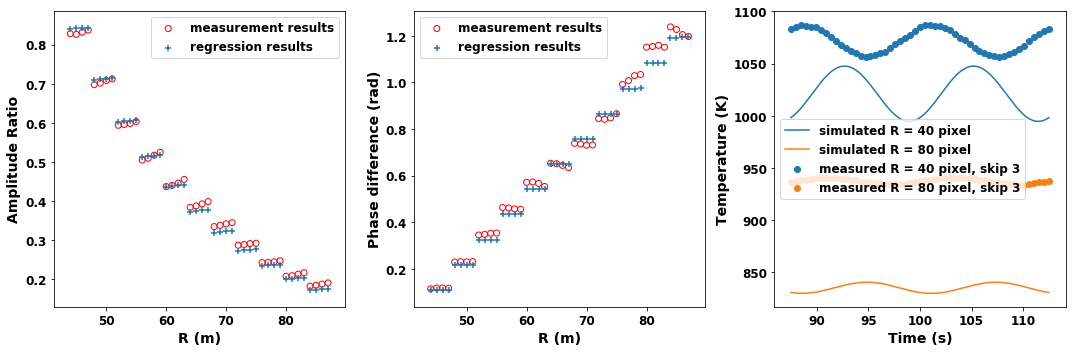

Temperature range for the parameter estimation is between937.6513440345527 K and 1071.846403714685 K.


In [8]:
show_regression_results(res['final_simplex'][0][0][0],df_temperature, df_amplitude_phase_measurement, sample_information,
                            vacuum_chamber_setting, solar_simulator_settings, light_source_property,
                            numerical_simulation_setting)

In [9]:
res['nfev']

22